In [1]:
## Import Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/diamonds.csv')
df.shape

(53940, 10)

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# let's check unique values
columns=df.columns
for col in columns:
    print(col,':\n',df[col].unique())
    print(df[col].value_counts())
    print('\n',20*'**','\n')

carat :
 [0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32 0.33 0.25 0.35 0.42
 0.28 0.38 0.7  0.86 0.71 0.78 0.96 0.73 0.8  0.75 0.74 0.81 0.59 0.9
 0.91 0.61 0.77 0.63 0.76 0.64 0.72 0.79 0.58 1.17 0.6  0.83 0.54 0.98
 0.52 1.01 0.53 0.84 0.51 1.05 0.55 0.87 1.   0.57 0.82 1.04 0.93 1.2
 0.99 0.34 0.43 0.36 0.95 0.89 1.02 0.97 0.56 0.85 0.92 1.27 0.66 1.12
 0.68 1.03 0.62 1.22 1.08 0.88 0.5  1.19 0.39 0.65 1.24 1.5  0.27 0.41
 1.13 1.06 0.69 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11
 1.1  1.18 1.15 1.25 1.07 1.28 1.51 0.37 1.31 1.26 1.39 1.44 1.35 1.3
 1.32 1.41 1.36 1.45 1.34 1.58 1.54 1.38 1.33 1.74 1.64 1.47 1.4  1.55
 1.95 2.   1.37 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15
 1.96 2.22 1.7  1.53 1.85 2.01 2.27 1.68 1.56 1.81 1.65 1.82 2.03 1.73
 1.59 1.42 1.43 2.08 1.48 1.6  2.49 1.71 2.02 2.07 3.   2.21 2.1  1.91
 2.25 2.17 2.32 2.72 1.61 2.23 2.11 2.05 1.63 2.3  2.31 1.75 2.04 2.12
 1.77 2.5  1.8  1.67 1.84 2.2  3.01 1.88 2.33 2.68 2.34 1.9  2.16 2.74


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
#Check for missing Value
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
#Check For Duplicates
df.duplicated().sum()

146

In [8]:
df = df.drop_duplicates()

In [9]:
#Check For Duplicates
df.duplicated().sum()

0

In [10]:
# Check for unique value in the columns
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [11]:
df.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

We have 3 categorical features : ['cut', 'color', 'clarity']


In [13]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### EDA

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

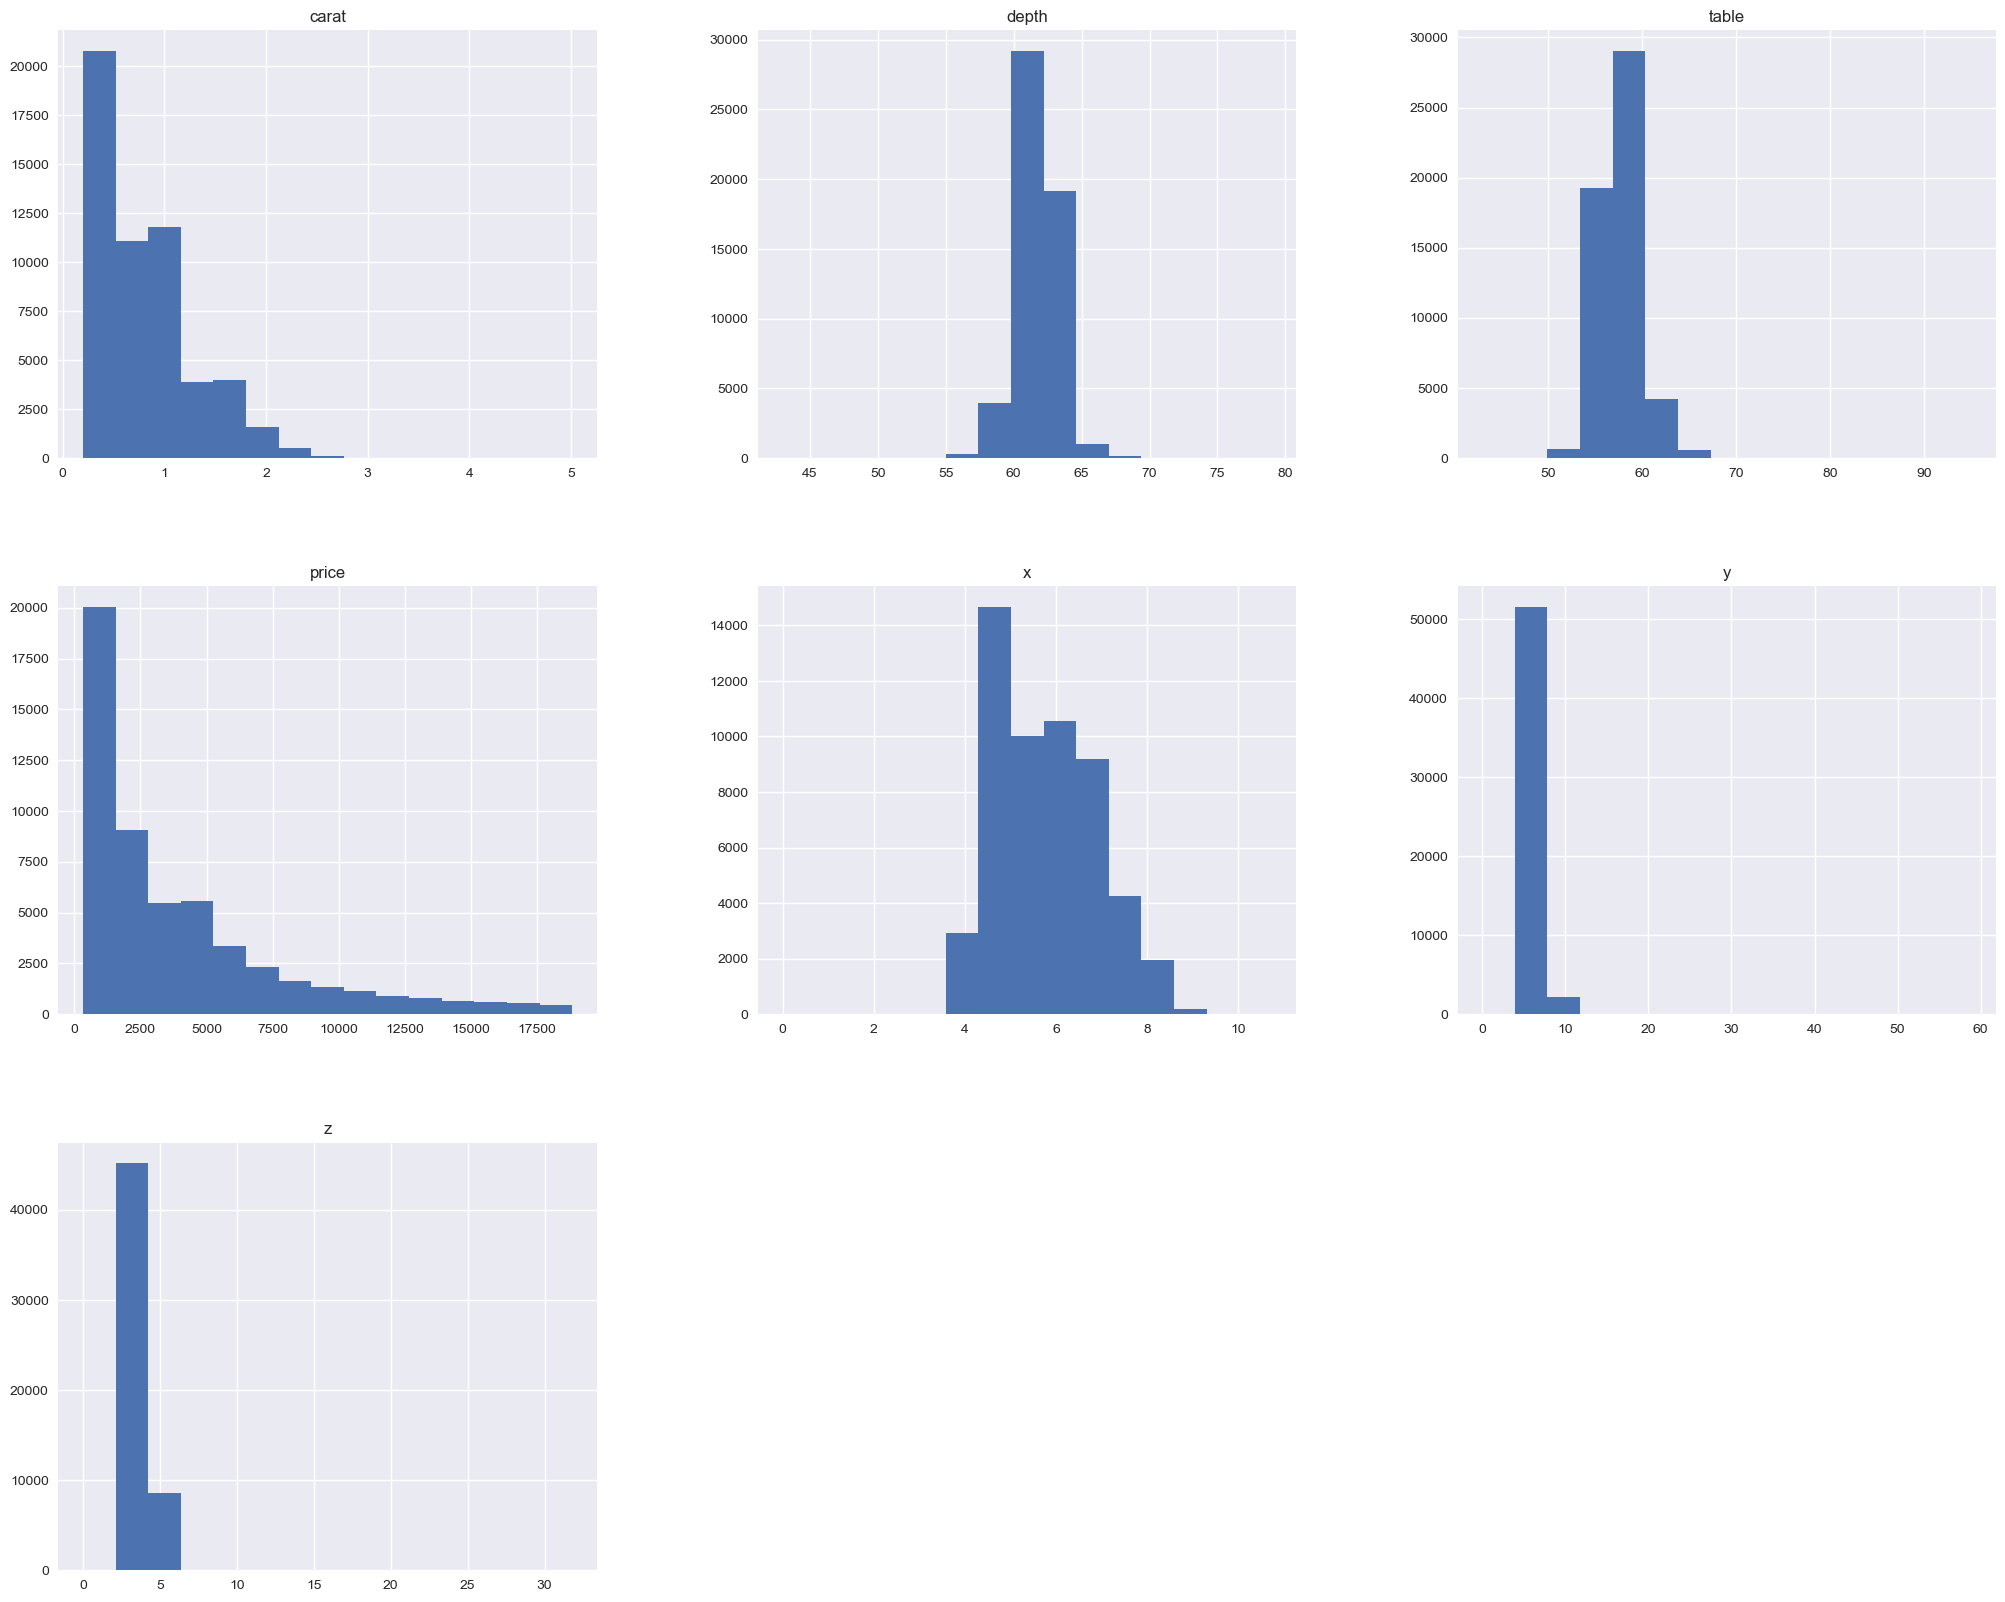

In [14]:
plt.style.use("seaborn")
df.hist(figsize=(25,20), bins=15)

In [15]:
df['cut'].value_counts()

Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: cut, dtype: int64

<Axes: xlabel='cut', ylabel='count'>

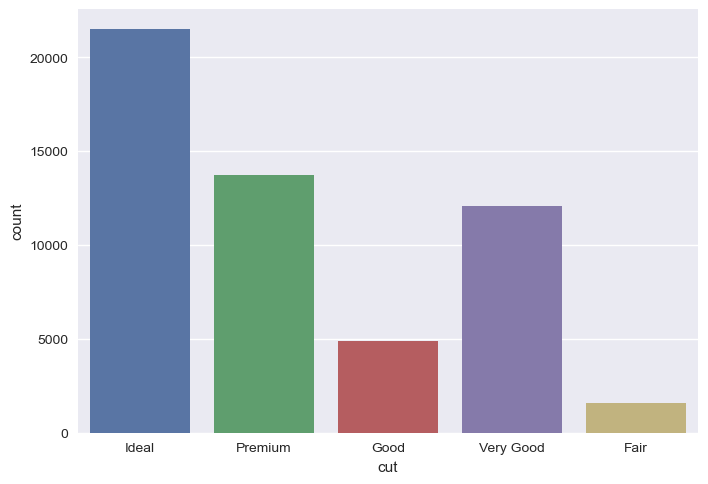

In [16]:
sns.countplot(x="cut", data=df)

<Axes: ylabel='cut'>

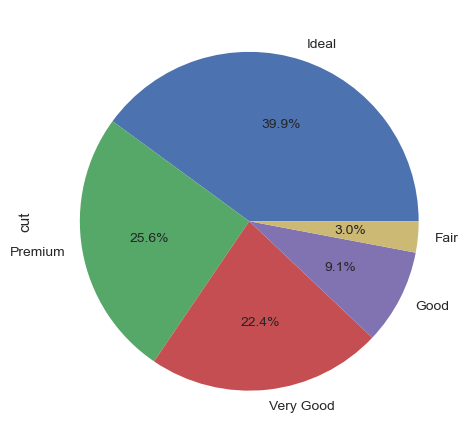

In [17]:
df['cut'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [18]:
df['color'].value_counts()

G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: color, dtype: int64

<Axes: xlabel='color', ylabel='count'>

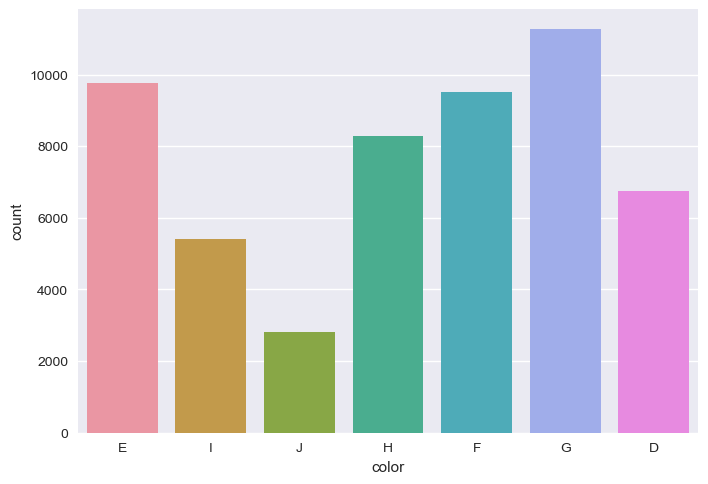

In [19]:
sns.countplot(x="color", data=df)

<Axes: ylabel='color'>

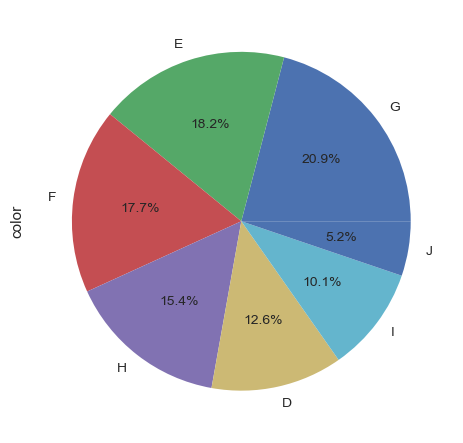

In [20]:
df['color'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [21]:
df['clarity'].value_counts()

SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: clarity, dtype: int64

<Axes: xlabel='clarity', ylabel='count'>

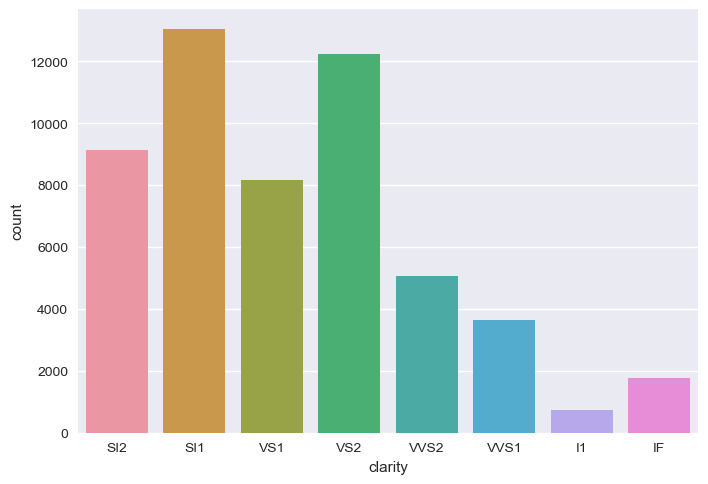

In [22]:
sns.countplot(x="clarity", data=df)

<Axes: ylabel='clarity'>

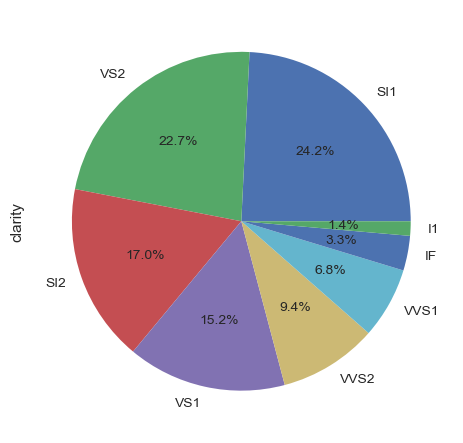

In [23]:
df['clarity'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [24]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.027861,0.181091,0.921548,0.975380,0.951908,0.953542
depth,0.027861,1.000000,-0.297669,-0.011048,-0.025348,-0.029389,0.094757
table,0.181091,-0.297669,1.000000,0.126566,0.194855,0.183231,0.150270
price,0.921548,-0.011048,0.126566,1.000000,0.884504,0.865395,0.861208
x,0.975380,-0.025348,0.194855,0.884504,1.000000,0.974592,0.970686
y,0.951908,-0.029389,0.183231,0.865395,0.974592,1.000000,0.951844
z,0.953542,0.094757,0.150270,0.861208,0.970686,0.951844,1.000000


(7.5, -0.5)

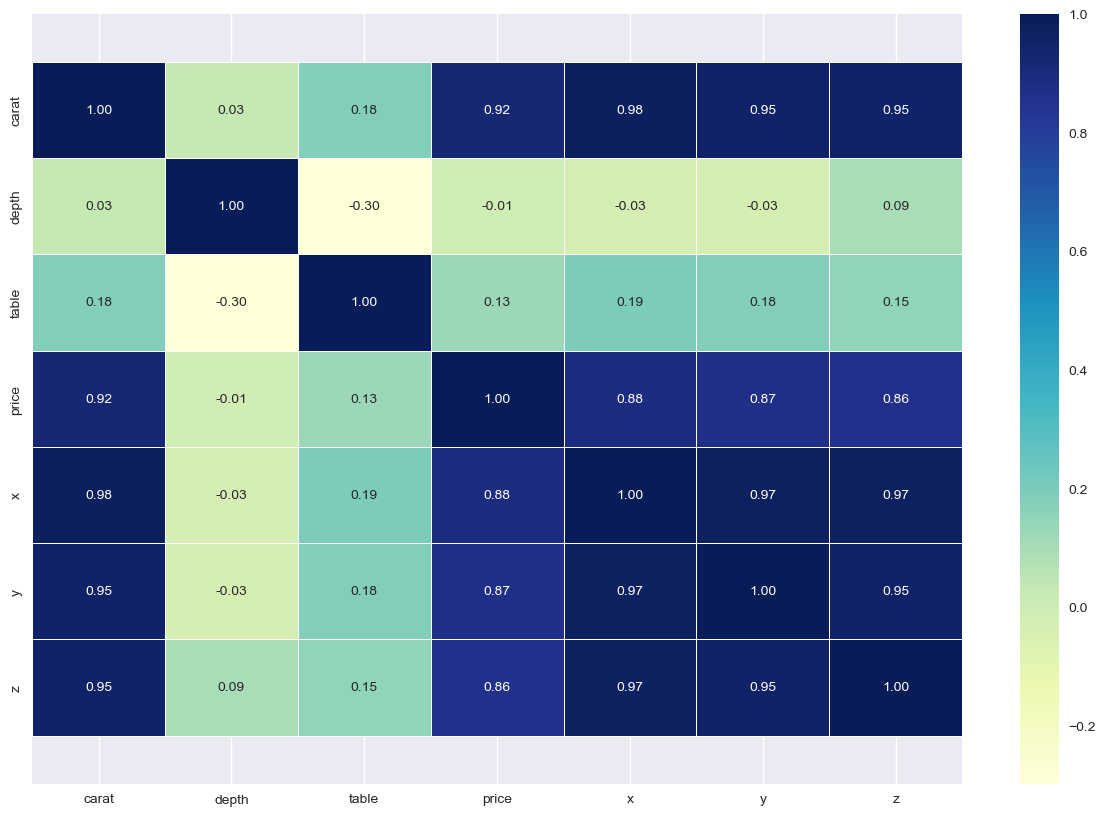

In [25]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Model Training

In [26]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [28]:
from sklearn.preprocessing import LabelEncoder

Lb = LabelEncoder()

df['cut']  = Lb.fit_transform(df['cut'])
df['color']  = Lb.fit_transform(df['color'])
df['clarity']  = Lb.fit_transform(df['clarity'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  int32  
 2   color    53794 non-null  int32  
 3   clarity  53794 non-null  int32  
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 3.9 MB


In [30]:
X = df.drop(['price'],axis=1) 

y = df['price']

In [31]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74


In [32]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53794, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [34]:
print("Test Data = ",X_test.shape)
print("Train Data = ",X_train.shape)
print("Target Train = ",y_train.shape)
print("Target Test = ",y_test.shape)

Test Data =  (10759, 9)
Train Data =  (43035, 9)
Target Train =  (43035,)
Target Test =  (10759,)


In [35]:
from sklearn.preprocessing import StandardScaler 
# Standard Scaler
std_scale = StandardScaler()
X_train = std_scale.fit_transform(X_train)


X_test = std_scale.transform(X_test)

In [36]:
X_train

array([[-0.94345735, -0.54238513, -1.52418638, ..., -1.1223499 ,
        -1.04690326, -1.07495192],
       [ 2.96422154, -0.54238513, -1.52418638, ...,  2.33490736,
         2.23305697,  2.3538824 ],
       [-0.56529488, -0.54238513, -0.93667968, ..., -0.43800849,
        -0.37876321, -0.5441282 ],
       ...,
       [-1.00648443, -0.54238513,  2.00085384, ..., -1.19345031,
        -1.14235183, -1.17537803],
       [ 0.2120391 ,  0.43196552,  2.00085384, ...,  0.35298353,
         0.25466826,  0.40274655],
       [ 0.44313838,  0.43196552,  0.23833373, ...,  0.5573972 ,
         0.49762828,  0.61794536]])

In [37]:
X_test

array([[-0.1871324 , -2.49108644,  2.00085384, ..., -0.09139401,
        -0.17918891,  0.11581481],
       [ 0.2120391 ,  1.40631617, -0.93667968, ...,  0.36187108,
         0.38482541,  0.31666703],
       [-0.48125877, -0.54238513,  0.23833373, ..., -0.38468319,
        -0.35273178, -0.34327598],
       ...,
       [-1.00648443, -0.54238513, -0.34917297, ..., -1.17567521,
        -1.13367469, -1.17537803],
       [ 1.55661678,  0.43196552, -0.93667968, ...,  1.40171453,
         1.43475977,  1.49308718],
       [-0.94345735,  0.43196552, -0.93667968, ..., -1.11346235,
        -1.12499755, -1.04625874]])

#### Create an Evaluate Function to give all metrics after model Training

In [38]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [39]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1360.7733
- Mean Absolute Error: 864.8496
- R2 Score: 0.8848
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1312.4473
- Mean Absolute Error: 840.7448
- R2 Score: 0.8870


Lasso
Model performance for Training set
- Root Mean Squared Error: 1360.8605
- Mean Absolute Error: 865.6994
- R2 Score: 0.8848
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1312.1359
- Mean Absolute Error: 841.2835
- R2 Score: 0.8870


Ridge
Model performance for Training set
- Root Mean Squared Error: 1360.7736
- Mean Absolute Error: 864.9422
- R2 Score: 0.8848
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1312.4323
- Mean Absolute Error: 840.8303
- R2 Score: 0.8870


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 661.4476
- Mean Absolute Error: 329.4712
- R2 Sco

### Results

In [40]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.983864
5,Random Forest Regressor,0.982574
6,XGBRegressor,0.981780
4,Decision Tree,0.967391
3,K-Neighbors Regressor,0.960841
8,AdaBoost Regressor,0.899409
1,Lasso,0.887043
2,Ridge,0.886992
0,Linear Regression,0.886989


### CatBoost Regressor

In [41]:
catboost_model = CatBoostRegressor(verbose=False)
catboost_model = catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 98.39


In [43]:
import pickle

In [44]:
pickle.dump(CatBoostRegressor(verbose=False),open('model.pkl','wb'))

In [45]:
pickle.dump(catboost_model,open('model2.pkl','wb'))